In [ ]:
! [ -e /content ] && pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.0 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threesxt = tensor(3.).requires_grad_()


## Using NeuralNet frameworks

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

### Stochastic Gradient Descent Example

In [ ]:
time = torch.arange(0,20).float()

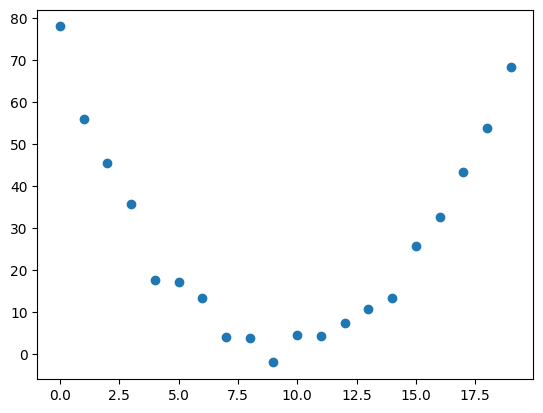

In [ ]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [ ]:
# best guess is to use quadratic fxn formula to predict
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [ ]:
params = torch.randn(3).requires_grad_()

In [ ]:
og_params = params.clone()

In [ ]:
preds = f(time, params)
preds

tensor([-3.3111e-01,  9.1764e-02, -1.1881e+00, -4.1708e+00, -8.8562e+00,
        -1.5244e+01, -2.3335e+01, -3.3129e+01, -4.4626e+01, -5.7825e+01,
        -7.2727e+01, -8.9332e+01, -1.0764e+02, -1.2765e+02, -1.4936e+02,
        -1.7278e+02, -1.9790e+02, -2.2472e+02, -2.5324e+02, -2.8347e+02],
       grad_fn=<AddBackward0>)

In [ ]:
loss = mse(preds, speed)
loss #goal is to improve this loss

TensorBase(23959.4004, grad_fn=<AliasBackward0>)

In [ ]:
loss.backward()

In [ ]:
params
params.grad

tensor([-51121.0859,  -3260.7761,   -240.1640])

In [ ]:
params.grad * 1e-4

tensor([-5.1121, -0.3261, -0.0240])

In [ ]:
params

tensor([-0.8514,  1.2743, -0.3311], requires_grad=True)

In [ ]:
# Learning rate is defined
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [ ]:
# Graphical Representation of actual v predicted values
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [ ]:
preds = f(time, params)
mse(preds, speed)

TensorBase(5131.7114, grad_fn=<AliasBackward0>)

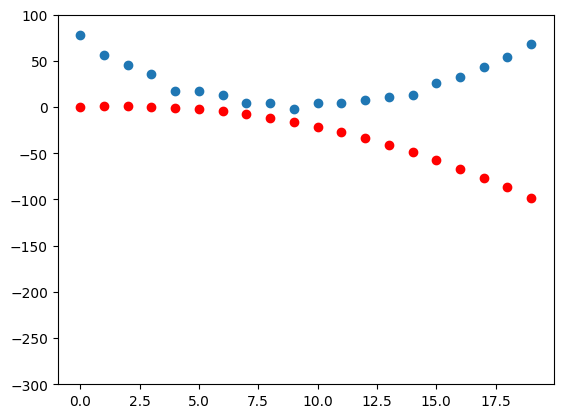

In [ ]:
show_preds(preds)

5131.71142578125
1568.933349609375
894.74169921875
767.1588134765625
743.010986328125
738.4364013671875
737.5655517578125
737.3955688476562
737.3582153320312
737.3458862304688


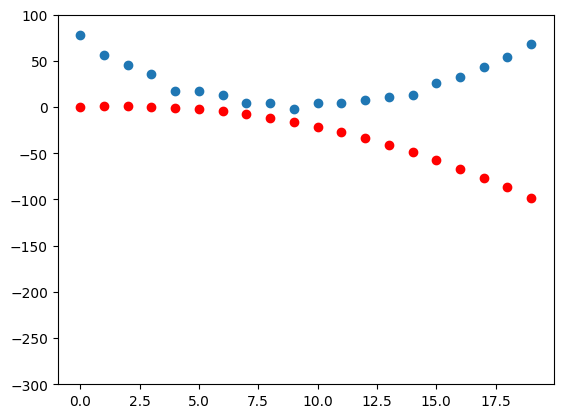

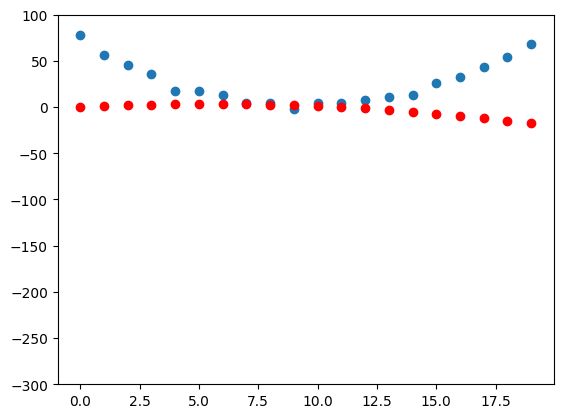

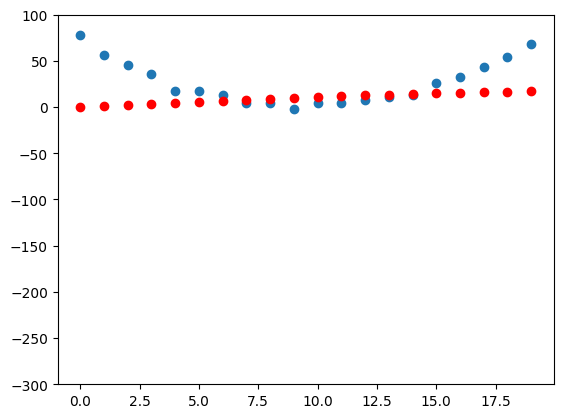

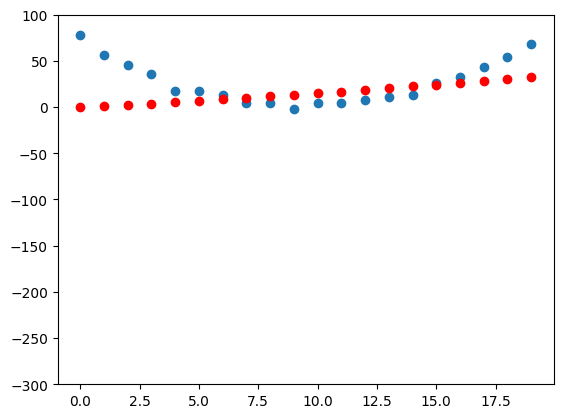

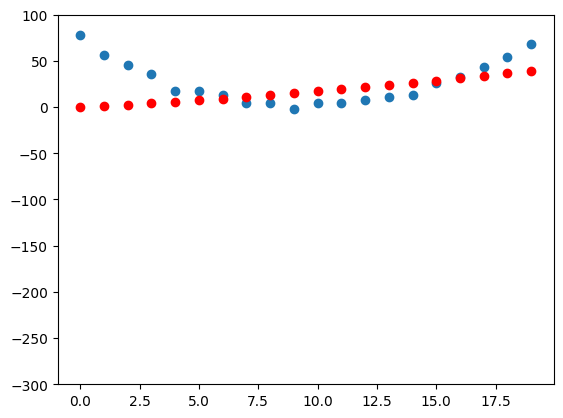

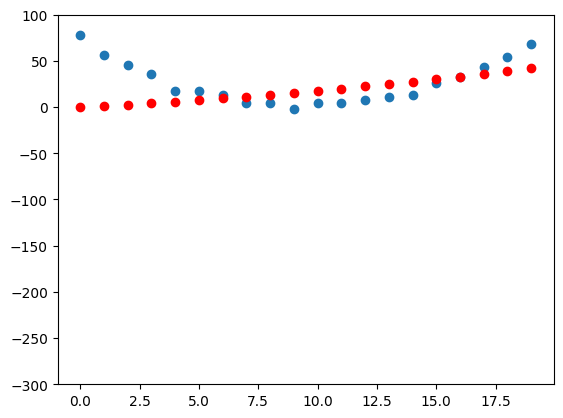

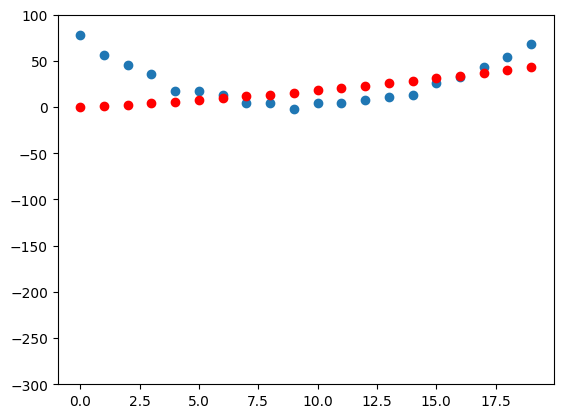

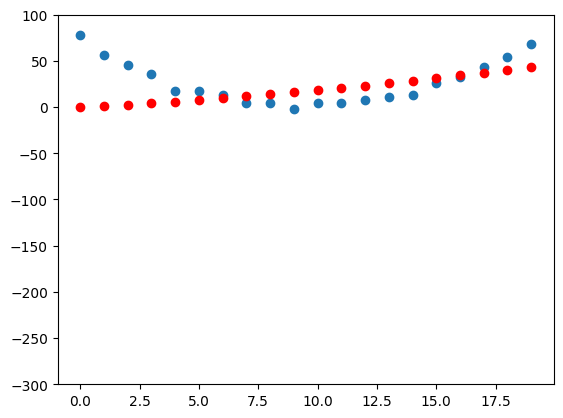

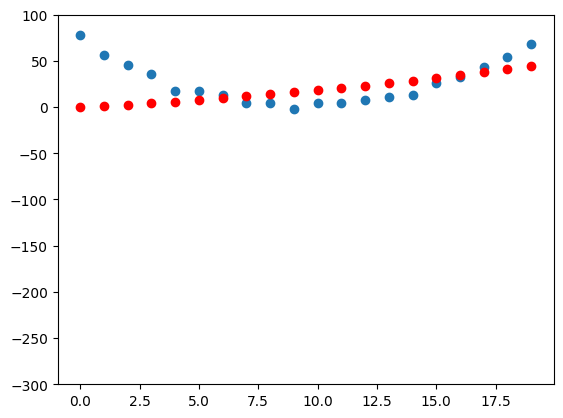

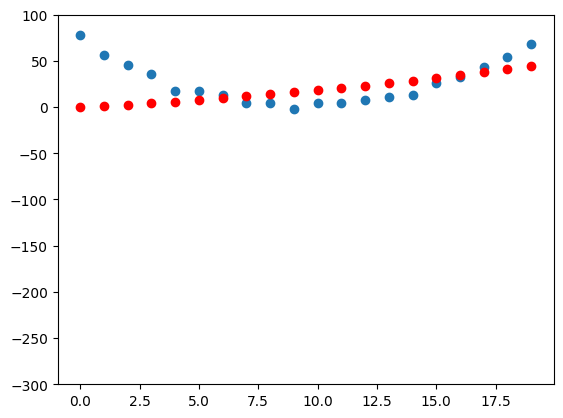

In [ ]:
for i in range(10):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if True: print(loss.item())
  show_preds(preds)

### Loss Function Example

In [ ]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [ ]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [ ]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [ ]:
dset = list(zip(train_x,train_y))
dset

[(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000

In [ ]:
x,y = dset[0]

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
#adding random weights
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))

In [ ]:
# from formula y=wx+b, this is the bias
bias = init_params(1)

In [ ]:
bias

tensor([-0.1262], requires_grad=True)

In [ ]:
#creating a loss fxn such that closer to 0 is 7, closer to 1 is 3
trgts = tensor([1,0,1])
preds = tensor([0.9, 0.5, 0.2])

In [ ]:
def mnist_loss(preds, trgs):
   return torch.where(trgs==1, 1-preds, preds).mean()

In [ ]:
mnist_loss(preds,trgts)

tensor(0.4667)

In [ ]:
#to ensure that loss is actually between 0 and 1, there is the sigmoid function
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

## The main code:

In [ ]:
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.3723)

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [ ]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
(preds>0.0).float() == train_y[:4]

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

NameError: name 'linear1' is not defined

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

NameError: name 'linear1' is not defined

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

NameError: name 'linear1' is not defined

In [ ]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

NameError: name 'linear1' is not defined

### Creating an Optimizer


In [ ]:
# pytorch function which combines the init_params and linear1 fxn together
linear_model = nn.Linear(28*28,1)

In [ ]:
w,b = linear_model.parameters()
w, b

(Parameter containing:
 tensor([[ 2.0980e-02,  2.6410e-03, -8.1969e-03, -5.9562e-03, -2.7475e-02,
           2.2666e-02,  2.3343e-02, -3.0836e-02,  3.1346e-02, -2.9814e-02,
          -8.2763e-03, -3.1019e-02,  1.8800e-02, -3.1976e-03,  2.2549e-03,
          -1.1343e-03,  2.8302e-02, -1.5888e-02, -3.7108e-03,  3.5485e-02,
          -2.0703e-02,  2.0541e-02,  2.8136e-02,  2.7676e-02,  2.8847e-02,
           3.4276e-02,  1.5410e-02, -6.7804e-03, -3.2520e-02,  3.0338e-02,
           1.2986e-02,  2.8709e-02, -1.7011e-02, -3.5548e-02,  3.2559e-02,
           5.0383e-05,  1.4941e-02,  2.8863e-02, -9.2620e-03,  5.2251e-04,
           2.3981e-02,  2.0726e-02,  1.0890e-02,  1.5594e-02,  1.9154e-02,
          -2.5404e-02,  6.6413e-03, -7.9092e-03, -1.8093e-02, -3.0681e-03,
          -8.6151e-03,  2.5384e-02,  9.7162e-04,  2.7166e-02,  1.9922e-02,
           2.5743e-02, -2.7521e-02,  3.4961e-02,  2.3594e-02, -2.8316e-02,
           1.6424e-02,  3.2984e-02,  2.0703e-02,  1.9865e-02,  1.0939e-02,
  

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.5789

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [ ]:
train_model(linear_model, 20)

0.4932 0.7944 0.8564 0.9184 0.9355 0.9497 0.9585 0.9648 0.9663 0.9682 0.9702 0.9726 0.9741 0.9751 0.9756 0.977 0.9775 0.978 0.978 0.979 

In [ ]:
# with the pytorch sgd fxn, same as our BasicOptim
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8227 0.8467 0.9121 0.9326 0.9472 0.956 0.9619 0.9658 0.9673 0.9687 0.9712 0.9731 0.9746 0.9761 0.9765 0.9775 0.978 0.9785 0.9785 

In [ ]:
#alternative method with fastai fxns
dls = DataLoaders(dl, valid_dl)

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(10, lr=lr)

In [ ]:
#ReLU fxn
plot_function(F.relu)

NameError: name 'plot_function' is not defined